In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Load dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

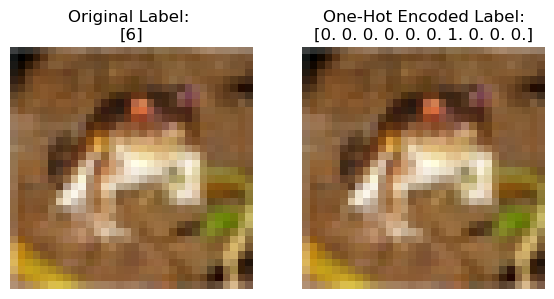

In [5]:
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
original_label = y_train
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualise one-hot encoding
plt.figure(figsize=(6, 3))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(x_train[0])
plt.title(f"Original Label: \n{original_label[0]}")
plt.axis('off')

# Show the one-hot encoded label
plt.subplot(1, 2, 2)
plt.imshow(x_train[0])
# plt.bar(range(10), y_train[0])  # Create a bar chart for the one-hot encoded label
plt.title(f"One-Hot Encoded Label:\n{y_train[0]}")
# plt.xticks(np.arange(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])  # Label for each class
plt.axis('off')

plt.tight_layout()
plt.show()

Partition training set into training and validation sets

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split 10% of the training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

(45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


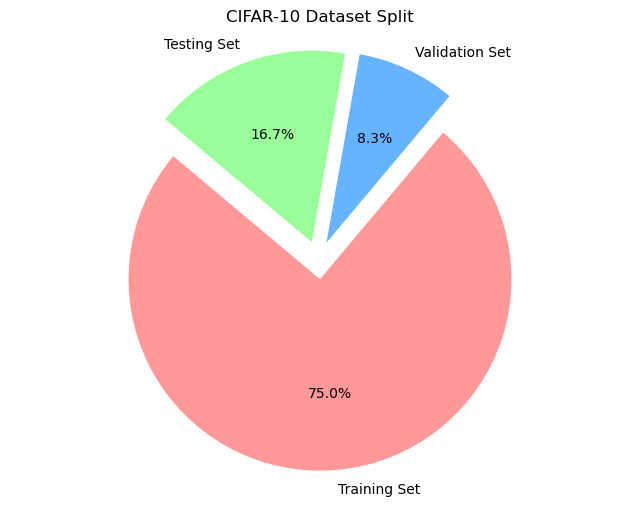

In [7]:
# Visualise split
# Data for the dataset split
print(x_train.shape, x_val.shape, x_test.shape, )
labels = ['Training Set', 'Validation Set', 'Testing Set']
sizes = [len(x_train), len(x_val), len(x_test)]  # Number of images
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.1, 0.1)  # explode the 1st slice (Training Set)

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('CIFAR-10 Dataset Split')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build a simple CNN model
model = Sequential()

# Convolutional & Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
...
# Flattening & Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Compile the model... Here, you define the loss function, optimizer, and metrics:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [11]:
#5 Train the model
# Define the number of epochs and include validation data for tuning:

history = model.fit(x_train, y_train,
                    epochs=20,                    # Train up to 50 epochs
                    validation_data=(x_val, y_val),
                    batch_size=64,                 # Batch size of 64
                    callbacks=[early_stopping]     # Early stopping callback
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.8405 - loss: 0.4532 - val_accuracy: 0.7178 - val_loss: 0.8677
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8484 - loss: 0.4229 - val_accuracy: 0.7302 - val_loss: 0.8545
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8615 - loss: 0.3830 - val_accuracy: 0.7224 - val_loss: 0.8935
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8735 - loss: 0.3537 - val_accuracy: 0.7156 - val_loss: 0.9626
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.8780 - loss: 0.3361 - val_accuracy: 0.7334 - val_loss: 0.9024


In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)  # Convert true one-hot encoded labels to class labels

# Step 2: Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 
                                                                     'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'])

# Step 3: Print the classification report
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

     Class 0       0.76      0.79      0.77      1000
     Class 1       0.78      0.88      0.83      1000
     Class 2       0.61      0.65      0.63      1000
     Class 3       0.56      0.56      0.56      1000
     Class 4       0.68      0.64      0.66      1000
     Class 5       0.73      0.50      0.59      1000
     Class 6       0.70      0.86      0.77      1000
     Class 7       0.74      0.78      0.76      1000
     Class 8       0.85      0.82      0.83      1000
     Class 9       0.83      0.74      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [ ]:
# Evaluating the Model - Visualise loss and accuracy

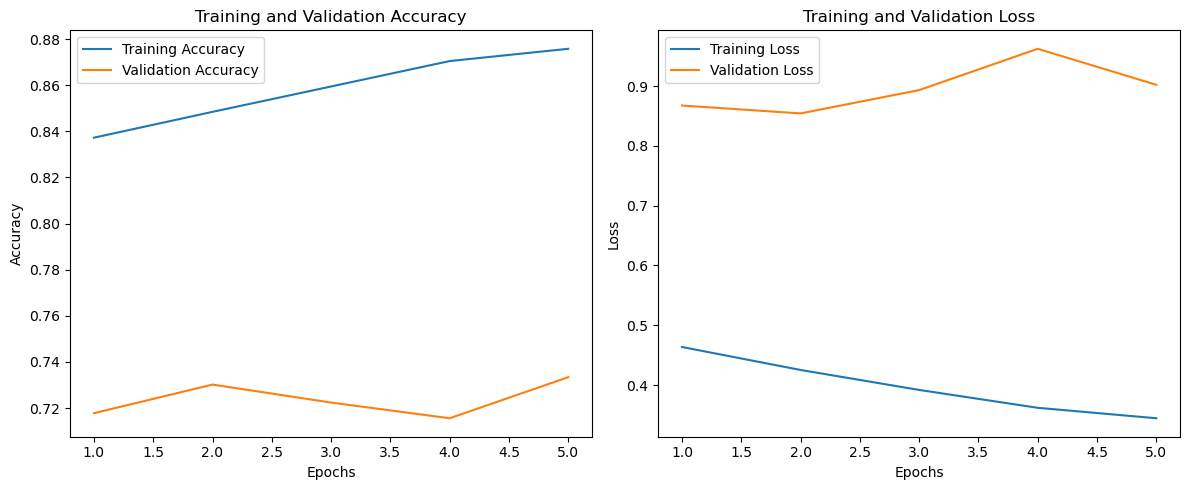

In [14]:
# Extract training and validation accuracy, and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots: one for accuracy, one for loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


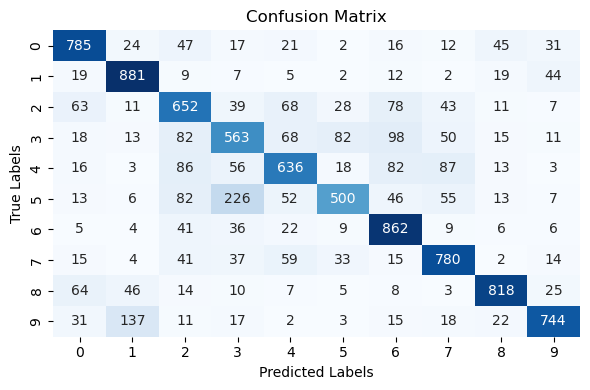

In [15]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Get the model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)  # True labels from one-hot encoding to class labels

# Step 2: Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
plt.show()